<a href="https://colab.research.google.com/github/RakeshReddyKondeti/Robotics_UniversityofLuebeck/blob/master/ComputerVision_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision SS 2021
## Exercise Sheet 1: Imaging
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Rakesh Reddy Kondeti
2. Cristopher Schmale
3. Tim-Henrik Traving
4. 
5. 


In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 45 (delta 8), reused 40 (delta 7), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [ ]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline 

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

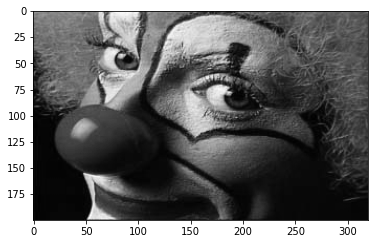

In [ ]:
# TODO: define image path
pathToImg = "/content/cs4250/data/exercise_1/clown.png"

# TODO: read image
image = cv2.imread(pathToImg)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# TODO: convert image to grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# TODO: display image
#plt.imshow(image_rgb)
plt.imshow(image_gray, cmap="gray")

## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two 
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function. 

We have to translate the normalized values of the one image to the normalized values of the second one. For example, a value of 255 would have a different meaning in the first image than in the second one. In order to visually compare this, we have to map this to the corresponding value on the second one, which might e.g. be 128, and therefore another color/brightness when visualized.

In [ ]:
def load_gray_normalized(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    return cv2.normalize(image_gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

[[148 156 159 ...  94  75  71]
 [132 144 153 ...  84  87  94]
 [131 139 143 ...  95 105 115]
 ...
 [ 15  11   5 ...   6   6   6]
 [ 15  11   5 ...   6   6   6]
 [ 15  11   5 ...   6   6   6]]
(1, 3)
(3, 1)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f08d54de250>,
 Text(0.5, 1.0, 'Y-Kernel'))

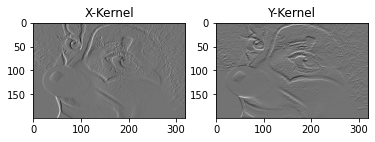

In [ ]:
# TODO: load image
img_test = load_gray_normalized("/content/cs4250/data/exercise_1/clown.png")
plt.imshow(img_test, cmap="gray")

#print(img_test)

# TODO: define kernels
kernelx = np.array([-1,0,1]).reshape((1,3))
kernely = np.array([[-1],[0],[1]]).reshape((3,1))

print(kernelx.shape)
print(kernely.shape)

# TODO: filter images
img_filteredx = cv2.filter2D(img_test, -1, kernelx)
img_filteredy = cv2.filter2D(img_test, -1, kernely)
minvalue = min(img_filteredx.min(), img_filteredy.min())
maxvalue = max(img_filteredx.max(), img_filteredy.max())

# TODO: display images
plt.subplot(1,2,1),plt.imshow(img_filteredx, cmap="gray", vmin=minvalue, vmax=maxvalue),plt.title("X-Kernel")
plt.subplot(1,2,2),plt.imshow(img_filteredy, cmap="gray", vmin=minvalue, vmax=maxvalue),plt.title("Y-Kernel")

..

## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`, 
then load and display them.  
Both images illustrate two commonly encountered problems in photography. 
Underexposed (overexposed) images are darker (brighter) than they should be, 
because they have been exposed to too little (too much) light. 

Compute and display the histograms of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed. 

These defects can be corrected by remapping the pixel values to achieve a 
more evenly distributed range of pixel intensities. 
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8`to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[0,255]$ (`np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

The logarithmic function changes rapidly for small values, and less for higher values. If applied to an image, this results in dark (small) pixelvalues to be "inflated" across a larger portion of the "brightness spectrum", while birght (high) pixelvalues will be "dimmed down". The quadratic function is the other way around.

In [ ]:
def display_with_hist(image):
    plt.subplot(1,2,1), plt.hist(image.ravel(),256,[0,256]), plt.title("Histogram")
    plt.subplot(1,2,2), plt.imshow(image, cmap="gray"), plt.title("Image")
    plt.show()

In [ ]:
def normalized_to_uint8(image):
    image = image * 255
    image = image.astype("uint8")
    return image

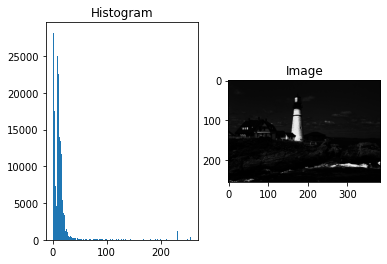

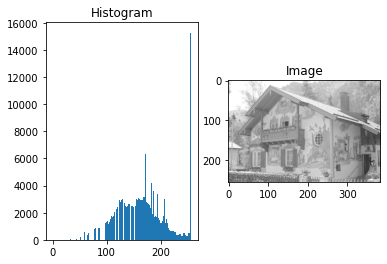

In [ ]:
# TODO: load images
img_131 = cv2.imread("/content/cs4250/data/exercise_1/ueb131.png")
img_132 = cv2.imread("/content/cs4250/data/exercise_1/ueb132.png")

# TODO: display images with histograms
display_with_hist(img_131)
display_with_hist(img_132)

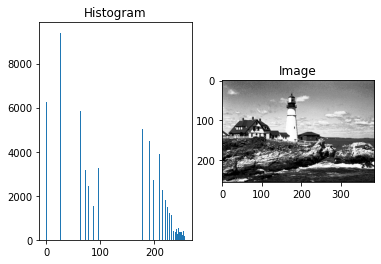

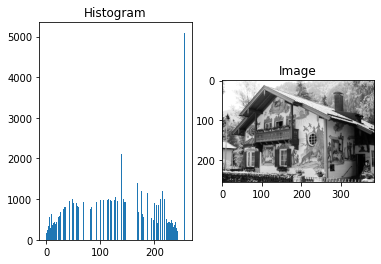

In [ ]:
# TODO: convert images to uint8
gray_norm_131 = load_gray_normalized("/content/cs4250/data/exercise_1/ueb131.png")
gray_norm_132 = load_gray_normalized("/content/cs4250/data/exercise_1/ueb132.png")
uint8_131 = normalized_to_uint8(gray_norm_131)
uint8_132 = normalized_to_uint8(gray_norm_132)

# TODO: equalize histogram and display
equ_131 = cv2.equalizeHist(uint8_131)
equ_132 = cv2.equalizeHist(uint8_132)

display_with_hist(equ_131)
display_with_hist(equ_132)

..

(<matplotlib.axes._subplots.AxesSubplot at 0x7f08d567b890>,
 Text(0.5, 1.0, 'quadratic function'))

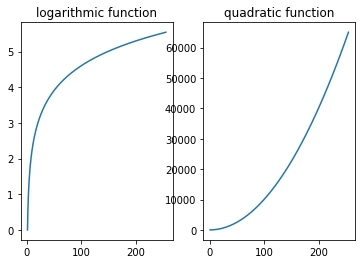

In [ ]:
# TODO: display logarithmic function
x = np.linspace(1, 255, 1000)
plt.subplot(1,2,1), plt.plot(x, np.log(x)), plt.title("logarithmic function")
# TODO: display quadratic function
plt.subplot(1,2,2), plt.plot(x, x*x), plt.title("quadratic function")

1


(<matplotlib.axes._subplots.AxesSubplot at 0x7f08d4410f10>,
 Text(0.5, 1.0, 'quadratic function'))

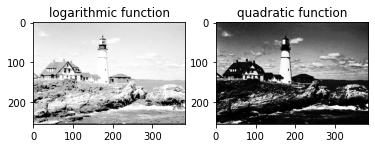

In [ ]:
# TODO: transform and display ueb131.png
equ_131 = np.where(equ_131 == 0, 1, equ_131)
equ_131 = equ_131.astype("int")

plt.subplot(1,2,1), plt.imshow(np.log(equ_131), cmap="gray"), plt.title("logarithmic function")
plt.subplot(1,2,2), plt.imshow(equ_131*equ_131, cmap="gray"), plt.title("quadratic function")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f08d3ec2c90>,
 Text(0.5, 1.0, 'quadratic function'))

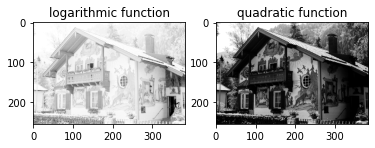

In [ ]:
# TODO: transform and display ueb132.png
equ_132 = np.where(equ_132 == 0, 1, equ_132)
equ_132 = equ_132.astype("int")

plt.subplot(1,2,1), plt.imshow(np.log(equ_132), cmap="gray"), plt.title("logarithmic function")
plt.subplot(1,2,2), plt.imshow(equ_132*equ_132, cmap="gray"), plt.title("quadratic function")